# D R A F T

This notebook makes charts based on the Sheffield Software Survey, displays them and saves them to a folder called `charts/`.

## Import required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
sheffield_df = pd.read_csv('./data/clean/sheffield_clean.csv')

funders_df = pd.read_csv('./data/clean/funders_clean.csv')

funder_counts_df = pd.read_csv('./data/clean/funder_counts_clean.csv')

funds_for_development_df = pd.read_csv('./data/clean/funds_for_development_clean.csv')

jobs_count_df = pd.read_csv('./data/clean/job_title_counts_clean.csv')

conf_order = ['Very confident','Confident','Not confident','Not heard of it']

## Function to easily add percentages

In [3]:
def annotate_pc(ax, total):
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height()/1.3
            ax.annotate(percentage, (x, y))

## Number of Responses

In [4]:
count_responses = len(sheffield_df.index)
count_responses

382

# In which faculty are you based?

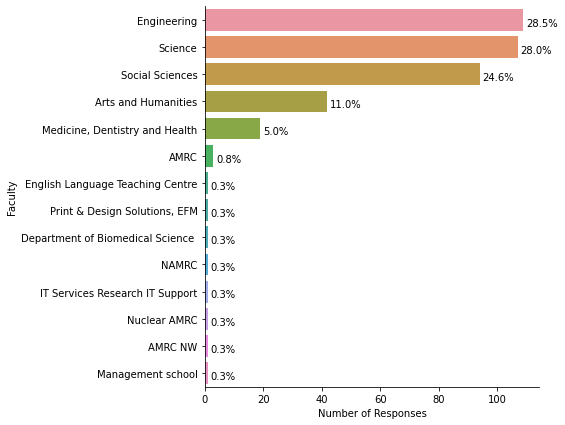

In [5]:
plt.figure(figsize=(6, 7))

ax = sns.countplot(data=sheffield_df, y='faculty', order=sheffield_df['faculty'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Faculty')

plt.savefig('charts/01_faculty.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Which of the following organisations usually fund your research?
Each individual respondant could specify multiple funding sources. 

Group 'All others' for cleaner plotting code - summation is handled in plotting.

In [6]:
funder_counts_df['group_funders'] = np.where(funder_counts_df['counts']<=4, 'All others', funder_counts_df['clean_funders'])
funder_counts_df_grp = funder_counts_df.groupby('group_funders')['counts'].sum().to_frame().reset_index()
funder_counts_df_grp['percent'] = funder_counts_df_grp['counts'] / len(funders_df.index)

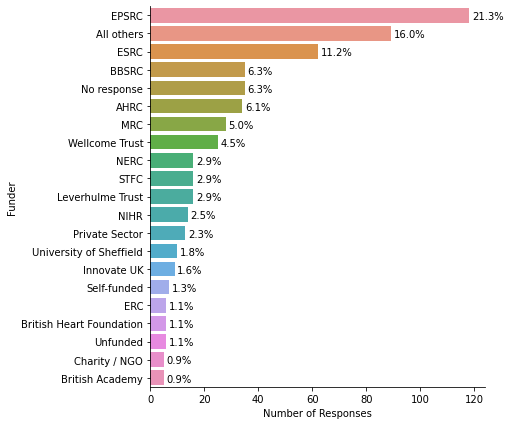

In [7]:
plt.figure(figsize=(6, 7))

ax = sns.barplot(data=funder_counts_df_grp, 
                 y='group_funders', x='counts', 
                 order=funder_counts_df_grp.sort_values('counts', ascending=False).group_funders)

sns.despine()

annotate_pc(ax, len(funders_df.index))

ax.set(xlabel='Number of Responses', ylabel='Funder')

plt.savefig('charts/02_funders.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# What is your job title?

Group 'All others' for cleaner plotting code - summation is handled in plotting.

In [8]:
jobs_count_df['group_jobs'] = np.where(jobs_count_df['counts']<=2, 'All others', jobs_count_df['clean_job'])
jobs_count_df_grp = jobs_count_df.groupby('group_jobs')['counts'].sum().to_frame().reset_index()
jobs_count_df_grp['percent'] = jobs_count_df_grp['counts'] / len(sheffield_df.index)

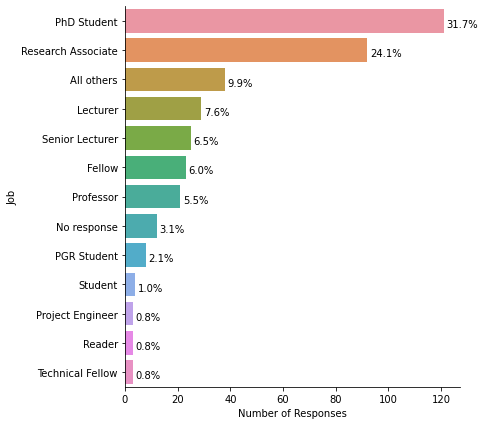

In [9]:
plt.figure(figsize=(6, 7))

ax = sns.barplot(data=jobs_count_df_grp, 
                 y='group_jobs', x='counts', 
                 order=jobs_count_df_grp.sort_values('counts', ascending=False).group_jobs)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Job')

plt.savefig('charts/03_job.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Do you use research software?
"Research software" is any software you have used in the generation of a result that you expect to appear in a publication. This might be anything from a few-line script to clean some data, to a fully fledged software suite. It includes code you have written yourself and code written by someone else.

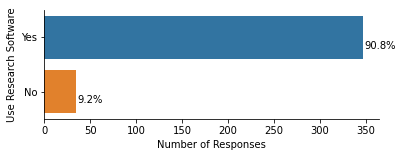

In [14]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='use_software', order=sheffield_df['use_software'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Use Research Software')

plt.savefig('charts/04_use.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How important is research software to your work?

1: Not at all

5: Vital

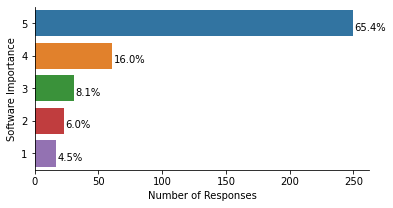

In [17]:
plt.figure(figsize=(6, 3))

ax = sns.countplot(data=sheffield_df, y='importance_software', order=sheffield_df['importance_software'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Software Importance')

plt.savefig('charts/05_important.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# Have you developed your own research software?

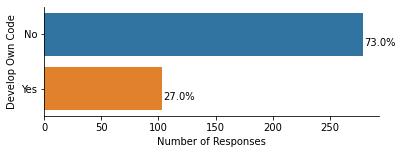

In [19]:
plt.figure(figsize=(6, 2))

ax = sns.countplot(data=sheffield_df, y='develop_own_code', order=sheffield_df['develop_own_code'].value_counts().index)

sns.despine()

annotate_pc(ax, count_responses)

ax.set(xlabel='Number of Responses', ylabel='Develop Own Code')

plt.savefig('charts/06_developed.png', facecolor='white', bbox_inches='tight', pad_inches=0.5)

# How do you rate your software development expertise?

1: Beginner.
5: Professional.

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(development_expertise):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('development_expertise', axis=alt.Axis(title='Development Expertise'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

rate_dev = bars + text

save(rate_dev, "charts/07_rate_dev.png")

rate_dev

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.development_expertise != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(development_expertise):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('development_expertise', axis=alt.Axis(title='Development Expertise'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

rate_dev = bars + text

save(rate_dev, "charts/07_rate_dev_exclude_no_response.png")

rate_dev

# Do you feel that you have received sufficient training to develop reliable software?

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(training):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('training', axis=alt.Axis(title='Sufficient Training'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

training = bars + text

save(training, "charts/08_training.png")

training

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.training != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(training):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('training', axis=alt.Axis(title='Sufficient Training'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

training = bars + text

save(training, "charts/08_training_exclude_no_response.png")

training

# Would you be interested in the university helping you commercialise some of your research software?

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(want_to_commercialise):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('want_to_commercialise', axis=alt.Axis(title='Want Help'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

commercialise = bars + text

save(commercialise, "charts/09_commercialise.png")

commercialise

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.want_to_commercialise != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(want_to_commercialise):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('want_to_commercialise', axis=alt.Axis(title='Want Help'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

commercialise = bars + text

save(commercialise, "charts/09_commercialise_exclude_no_response.png")

commercialise

# Do you feel that your research software is ready to be shared with a commercial partner?

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(ready_to_share):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('ready_to_share', axis=alt.Axis(title='Ready to Share'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

partner = bars + text

save(partner, "charts/10_partner.png")

partner

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.ready_to_share != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(ready_to_share):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('ready_to_share', axis=alt.Axis(title='Ready to Share'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

partner = bars + text

save(partner, "charts/10_partner_exclude_no_response.png")

partner

# Have you used ShARC/Bessemer, the University's high-performance computing (HPC) system?

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(hpc_use):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hpc_use', axis=alt.Axis(title='HPC Use'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.1%')
)

hpc = bars + text

save(hpc, "charts/11_hpc.png")

hpc

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hpc_use != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(hpc_use):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hpc_use', axis=alt.Axis(title='HPC Use'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.1%')
)

hpc = bars + text

save(hpc, "charts/11_hpc_exclude_no_response.png")

hpc

# How confident are you with the following technologies? [Version control]

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(version_control):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('version_control', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_vc = bars + text

save(tech_vc, "charts/12_tech_vc.png")

tech_vc

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.version_control != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(version_control):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('version_control', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_vc = bars + text

save(tech_vc, "charts/12_tech_vc_exclude_no_response.png")

tech_vc

# How confident are you with the following technologies? [Continuous integration]

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(continuous_integration):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('continuous_integration', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_ci = bars + text

save(tech_ci, "charts/13_tech_ci.png")

tech_ci

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.continuous_integration != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(continuous_integration):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('continuous_integration', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_ci = bars + text

save(tech_ci, "charts/13_tech_ci_exclude_no_response.png")

tech_ci

# How confident are you with the following technologies? [Unit testing]

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(unit_testing):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('unit_testing', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_test = bars + text

save(tech_test, "charts/14_tech_test.png")

tech_test

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.unit_testing != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(unit_testing):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('unit_testing', sort=conf_order, axis=alt.Axis(title='Confidence'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

tech_test = bars + text

save(tech_test, "charts/14_tech_test_exclude_no_response.png")

tech_test

# How would you rate the university's current level of support for your software-development needs?

1 poor, 5 excellent

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(current_support):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('current_support:N', axis=alt.Axis(title='Software Needs'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

support = bars + text

save(support, "charts/15_support.png")

support

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.current_support != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(current_support):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('current_support:N', axis=alt.Axis(title='Software Needs'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

support = bars + text

save(support, "charts/15_support_exclude_no_response.png")

support

# Have you or someone in your group ever hired someone specifically to develop software?

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(hired_developer):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hired_developer', axis=alt.Axis(title='Hired'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

hired = bars + text

save(hired, "charts/16_hired.png")

hired

# Have you ever included costs for software development in a funding proposal?

Check all that apply

In [ ]:
bars = alt.Chart(funds_for_development_df).mark_bar().encode(
    x=alt.X('count(funds_for_development):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('funds_for_development', sort='-x', axis=alt.Axis(title='Funds'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

funding = bars + text

save(funding, "charts/17_funding.png")

funding

In [ ]:
funds_for_development_df_excl_not_funding = funds_for_development_df[(funds_for_development_df.funds_for_development != "No (I'm not involved in writing funding proposals)")]

bars = alt.Chart(funds_for_development_df_excl_not_funding).mark_bar().encode(
    x=alt.X('count(funds_for_development):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('funds_for_development', sort='-x', axis=alt.Axis(title='Funds'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

funding = bars + text

save(funding, "charts/17a_funding_excl_not_funding.png")

funding

Percent expecting to write software, but not asking for money to do so.

In [ ]:
0.18/(0.27+0.18)*100

# How suitable would the following models be for your software development needs? [Hire a full-time software developer]

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(hire_full_time_developer):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hire_full_time_developer', axis=alt.Axis(title='Hire'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

model_ft = bars + text

save(model_ft, "charts/18_model_ft.png")

model_ft

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hire_full_time_developer != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(hire_full_time_developer):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hire_full_time_developer', axis=alt.Axis(title='Hire'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

model_ft = bars + text

save(model_ft, "charts/18_model_ft_exclude_no_response.png")

model_ft

# How suitable would the following models be for your software development needs? [Recruit a developer (or fractional FTE equivalent of a developer) from a central University of Sheffield pool as needed]

In [ ]:
bars = alt.Chart(sheffield_df).mark_bar().encode(
    x=alt.X('count(hire_rse):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hire_rse', axis=alt.Axis(title='RSE'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

model_rse = bars + text

save(model_rse, "charts/19_model_rse.png")

model_rse

In [ ]:
sheffield_df_excl_no_resp = sheffield_df[(sheffield_df.hire_rse != 'No response')]

bars = alt.Chart(sheffield_df_excl_no_resp).mark_bar().encode(
    x=alt.X('count(hire_rse):Q', axis=alt.Axis(title='Number of Responses')),
    y=alt.Y('hire_rse', axis=alt.Axis(title='RSE'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).encode(
    text=alt.Text('sum(pct):Q', format=',.0%')
)

model_rse = bars + text

save(model_rse, "charts/19_model_rse_exclude_no_response.png")

model_rse